# TASK2

## From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Submitted by- Vaishali Gupta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the dataset

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop('Id', axis = 1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

In [7]:
df.isnull().sum() #null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Data Visualization

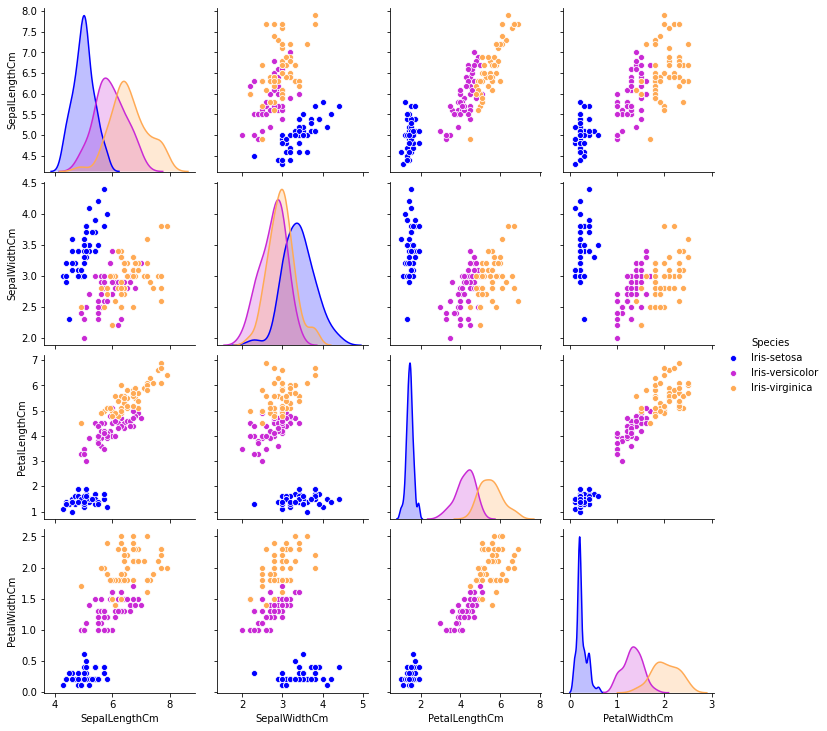

In [9]:
sns.pairplot(df, hue = 'Species', palette='gnuplot2')

In [19]:
#Label Encod
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species']= le.fit_transform(df['Species']) 
df['Species'].unique()

array([0, 1, 2])

In [20]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

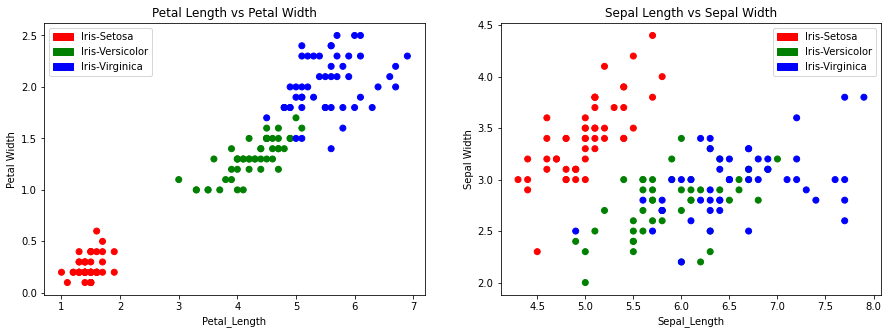

In [21]:
import matplotlib.patches as mpatches
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(df['Species'])

red_patch = mpatches.Patch(color='red', label='Iris-Setosa')
green_patch = mpatches.Patch(color='green', label='Iris-Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Iris-Virginica')


plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=colors[df['Species']])
plt.title('Petal Length vs Petal Width')
plt.xlabel("Petal_Length")
plt.ylabel("Petal Width")
plt.legend(handles=[red_patch, green_patch, blue_patch])


plt.subplot(1,2,2)
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=colors[df['Species']])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel("Sepal_Length")
plt.ylabel("Sepal Width")
plt.legend(handles=[red_patch, green_patch, blue_patch])


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species']= le.fit_transform(df['Species']) 
df['Species'].unique()

array([0, 1, 2])

## K-Means Model

In [15]:
from sklearn.cluster import KMeans
# elbow method to find best number of k (should be 3 in this case)
errors = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X)
    errors.append(kmeans.inertia_)

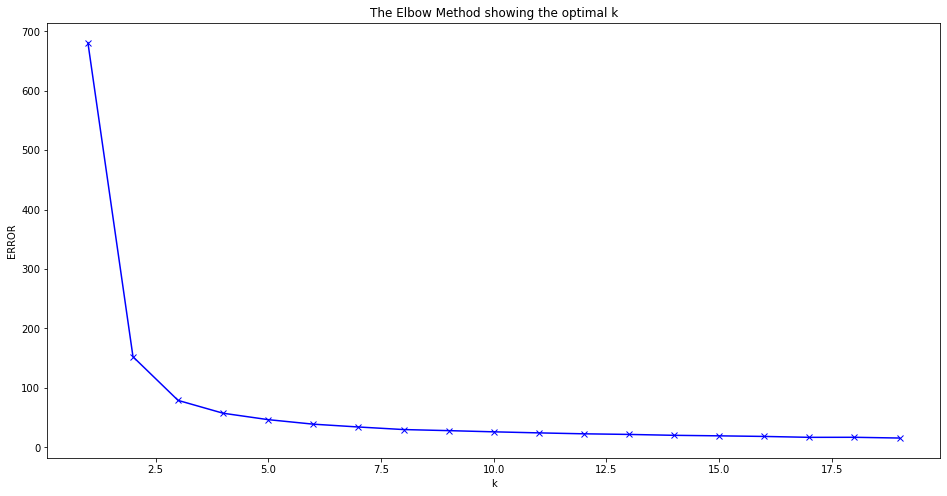

In [16]:
#Elbow Method

plt.figure(figsize=(16,8))
plt.plot(range(1,20), errors, 'bx-')
plt.xlabel('k')
plt.ylabel('ERROR')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [17]:
#fitting the model with k = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [18]:
y_pred = kmeans.fit_predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [19]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [23]:
y[:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

## Comparisions

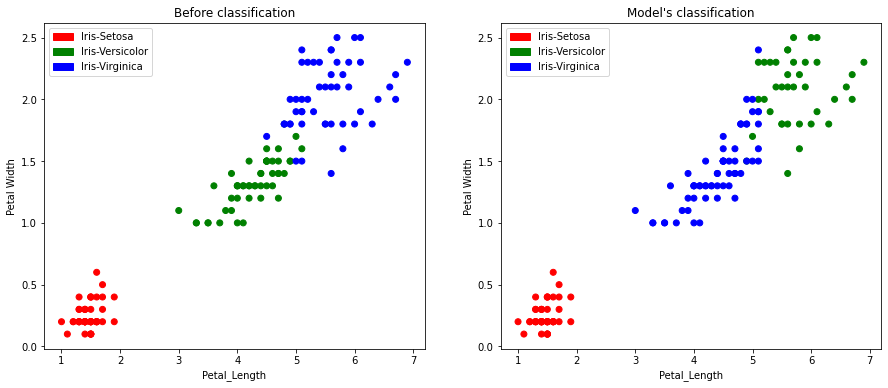

In [24]:
#Petal_Length vs Petal Width

colors = np.array(['red', 'green', 'blue'])
plt.figure(figsize=(15,6))
predictedY = np.choose(kmeans.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=colors[df['Species']])
plt.title('Before classification')
plt.xlabel("Petal_Length")
plt.ylabel("Petal Width")
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=colors[predictedY])
plt.title("Model's classification")
plt.xlabel("Petal_Length")
plt.ylabel("Petal Width")
plt.legend(handles=[red_patch, green_patch, blue_patch])

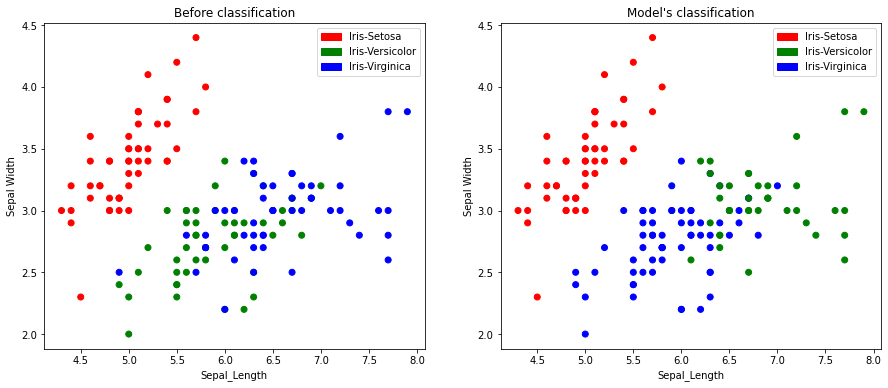

In [25]:
#Sepal Length vs Sepal Width

colors = np.array(['red', 'green', 'blue'])
plt.figure(figsize=(15,6))
predictedY = np.choose(kmeans.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=colors[df['Species']])
plt.title('Before classification')
plt.xlabel("Sepal_Length")
plt.ylabel("Sepal Width")
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=colors[predictedY])
plt.title("Model's classification")
plt.xlabel("Sepal_Length")
plt.ylabel("Sepal Width")
plt.legend(handles=[red_patch, green_patch, blue_patch])

# THANK YOU